In [105]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
from sklearn.ensemble import IsolationForest

In [52]:
 df=pd.read_excel("/kaggle/input/copper-set/Copper_Set.xlsx")

In [3]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [4]:
m=[]
for i in df["material_ref"]:
    
      if re.search("^00000",str(i)) is not None:
            
    
            m.append(True)
      else:
            m.append(False)



In [5]:
df.loc[m,"material_ref"]=np.NaN

In [13]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [14]:
df["material_ref"].dtype

dtype('O')

In [6]:
num_cols=[]
cat_cols=[]
for i, x in enumerate(df.dtypes):
    if x==object:
        cat_cols.append(df.columns[i])
    elif x==float or x==int:
        num_cols.append(df.columns[i])
    else:
        print(df.columns[i])

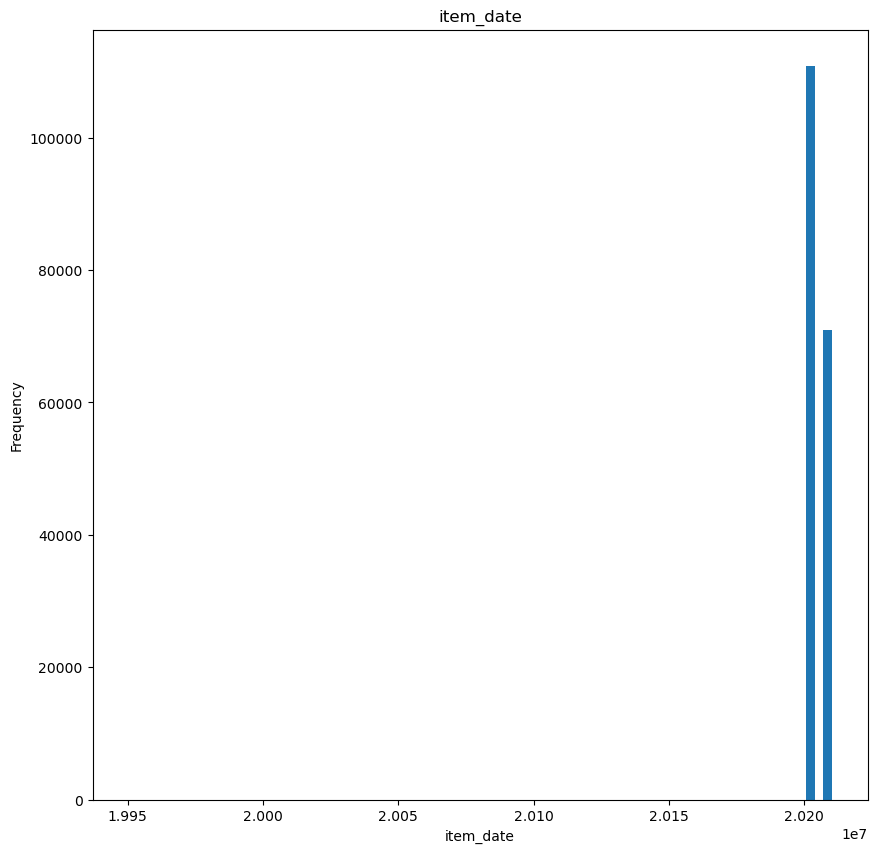

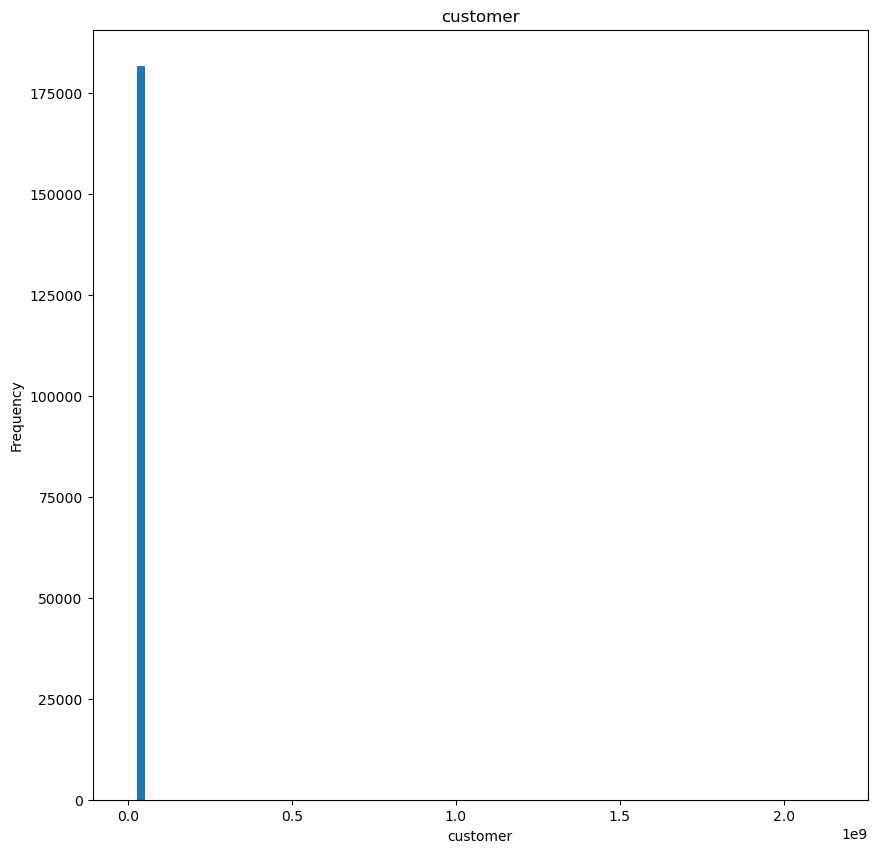

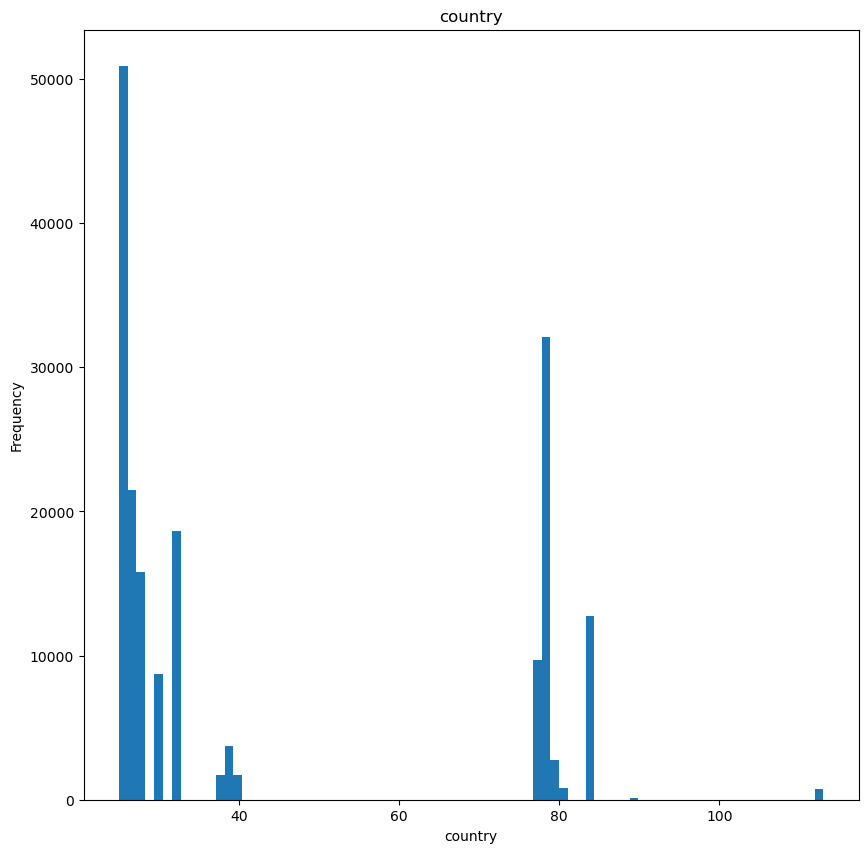

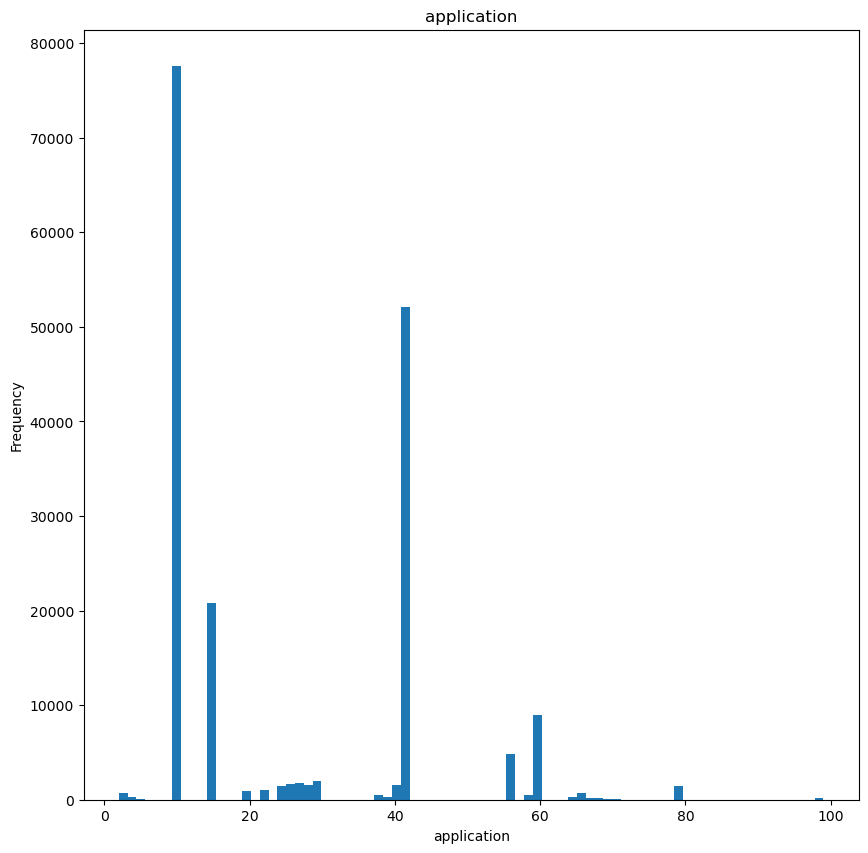

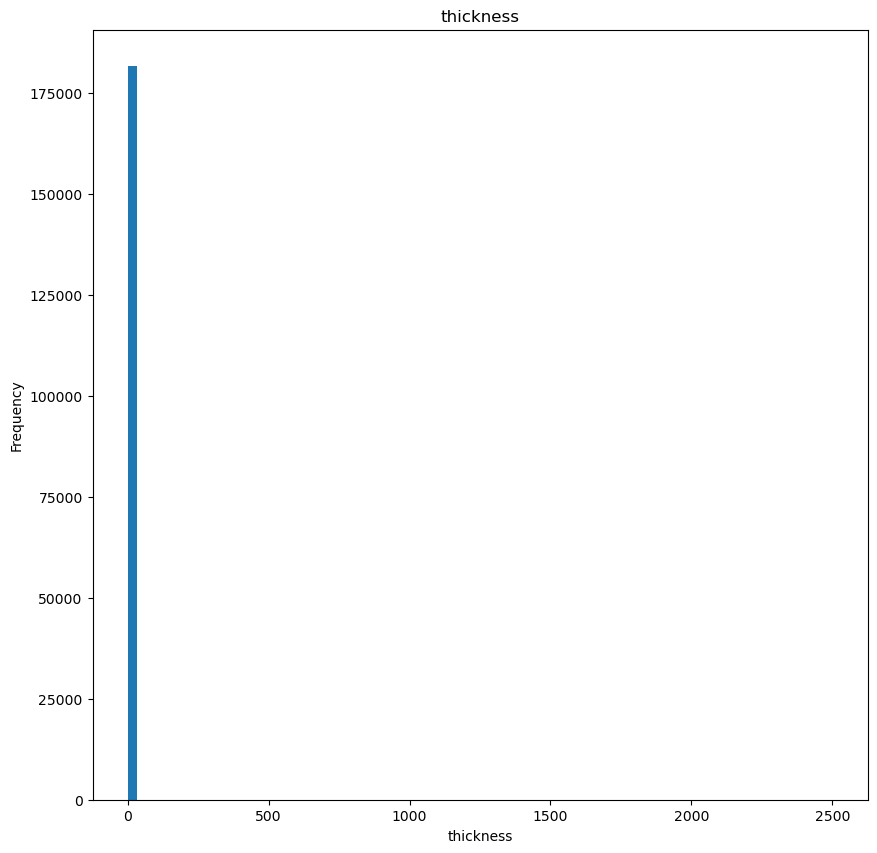

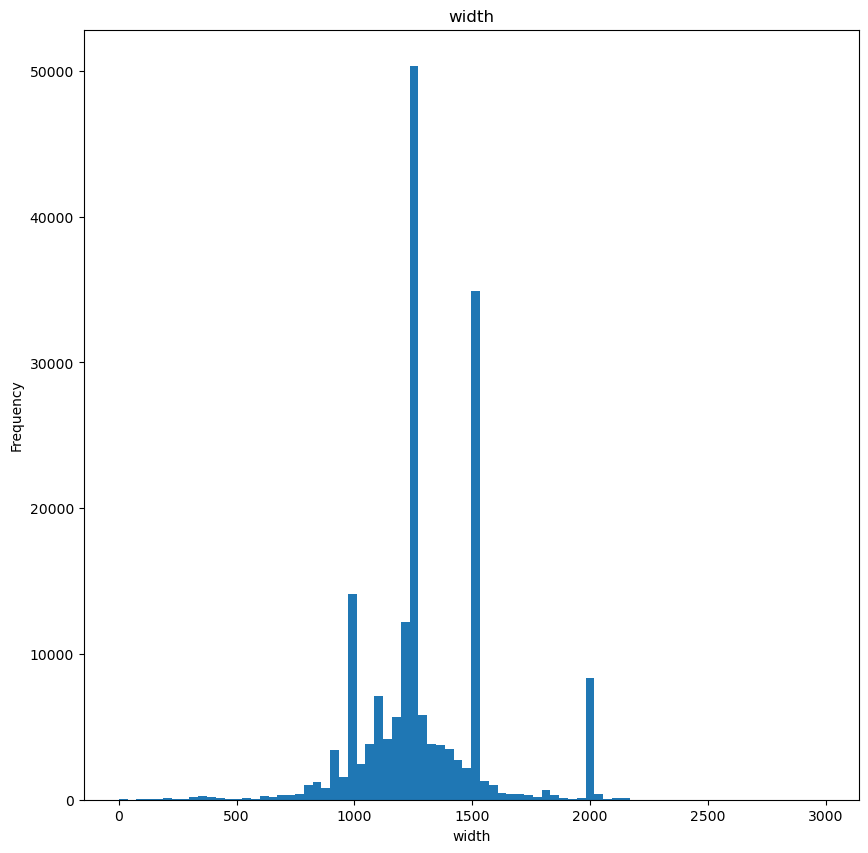

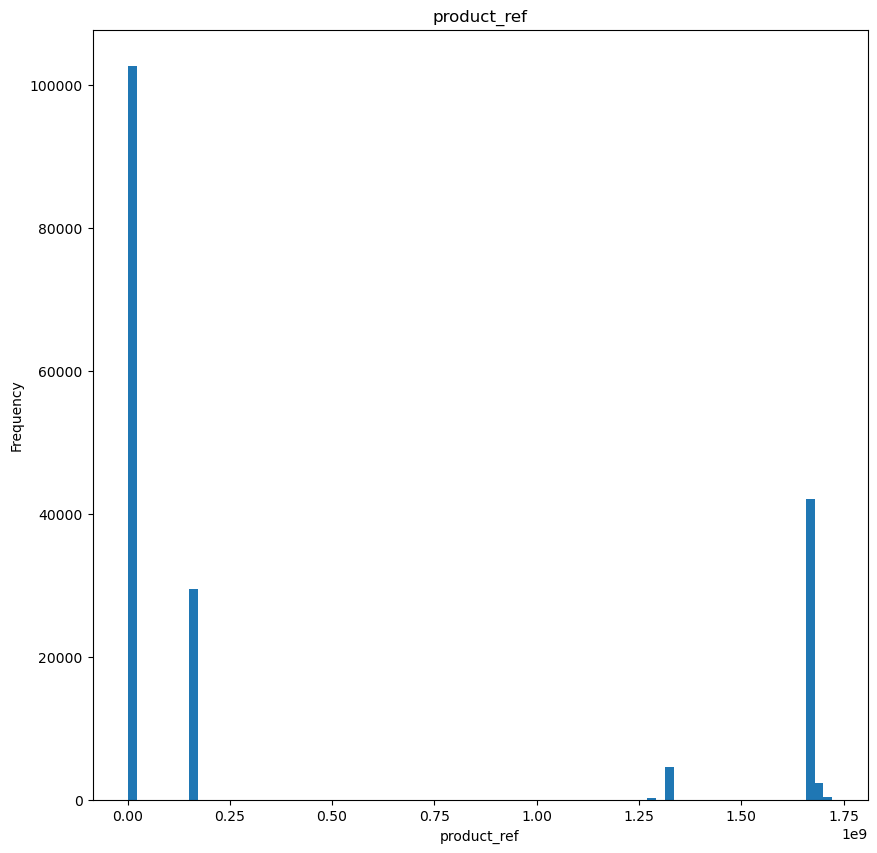

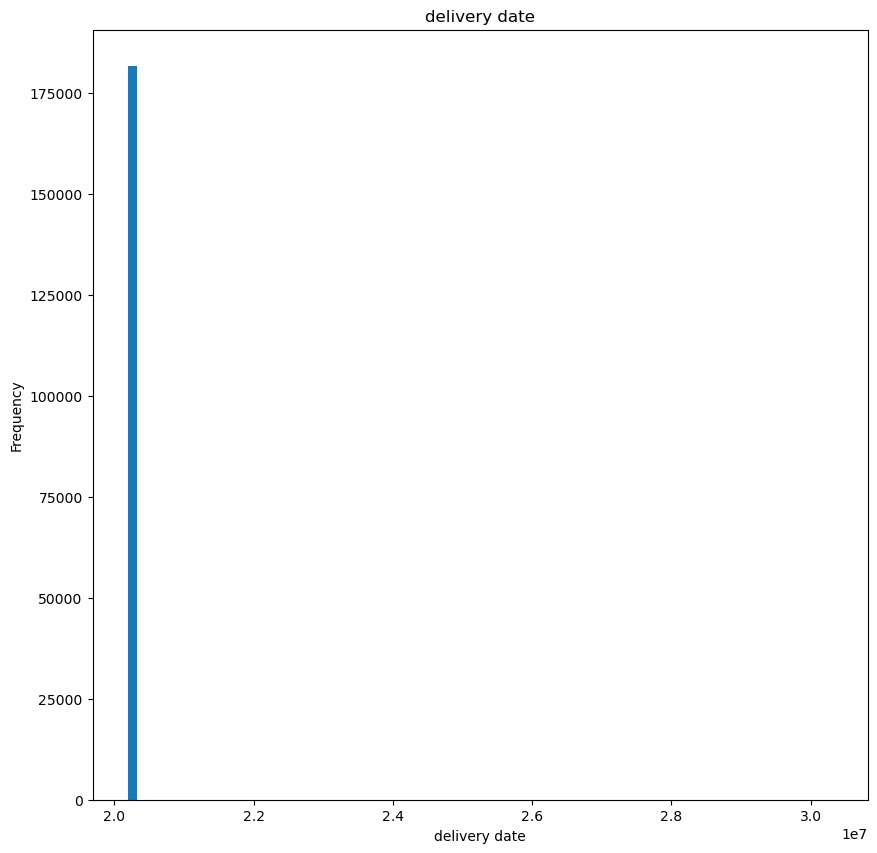

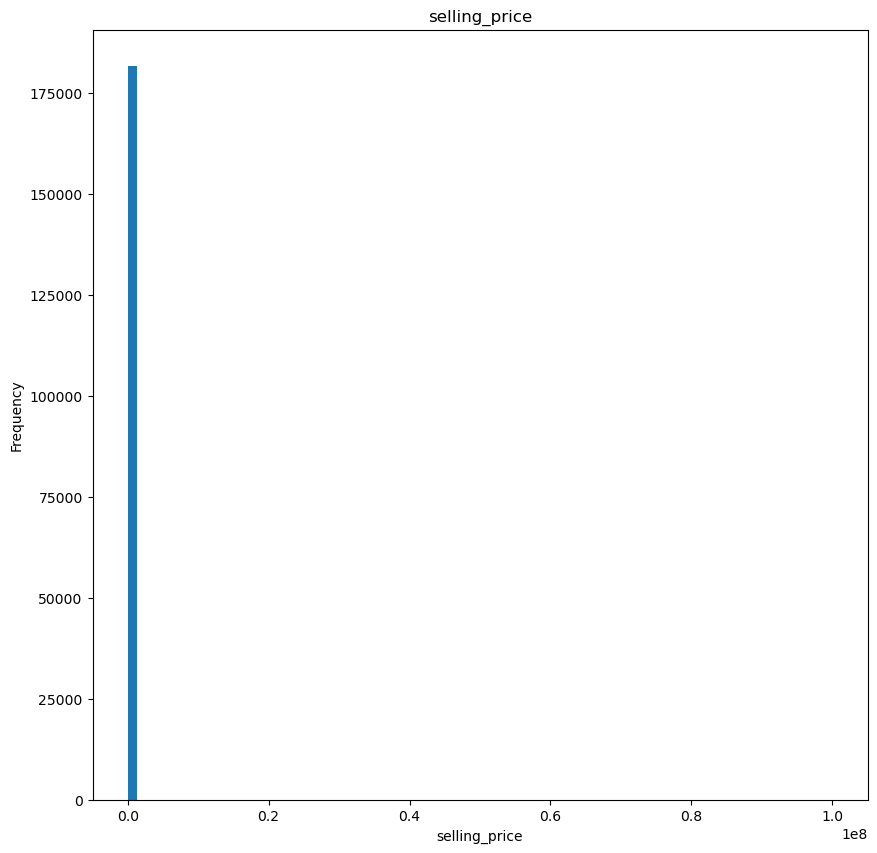

In [66]:
for col in num_cols:
    plt.figure(figsize=(10, 10))  # Adjust figsize as needed
    plt.hist(df[col], bins=80)   # You can use different plot types like scatter, boxplot, etc.
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [78]:
cat_cols

['id', 'quantity tons', 'status', 'item type', 'material_ref']

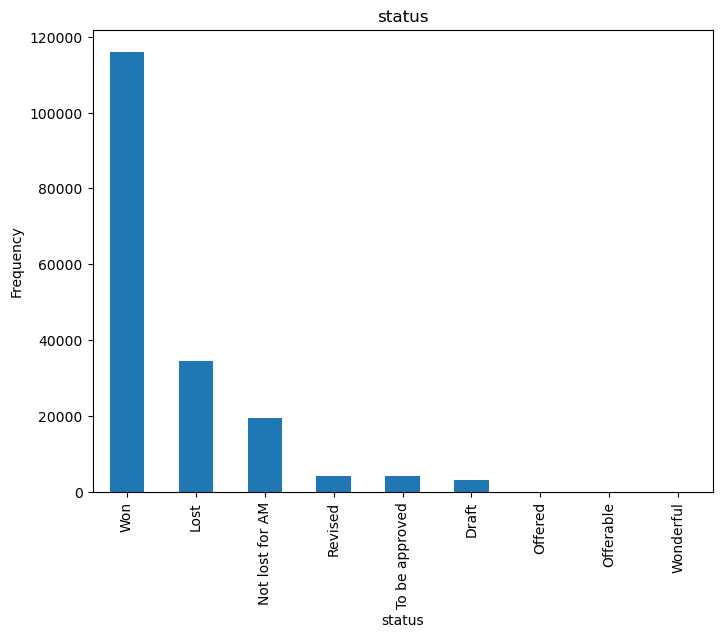

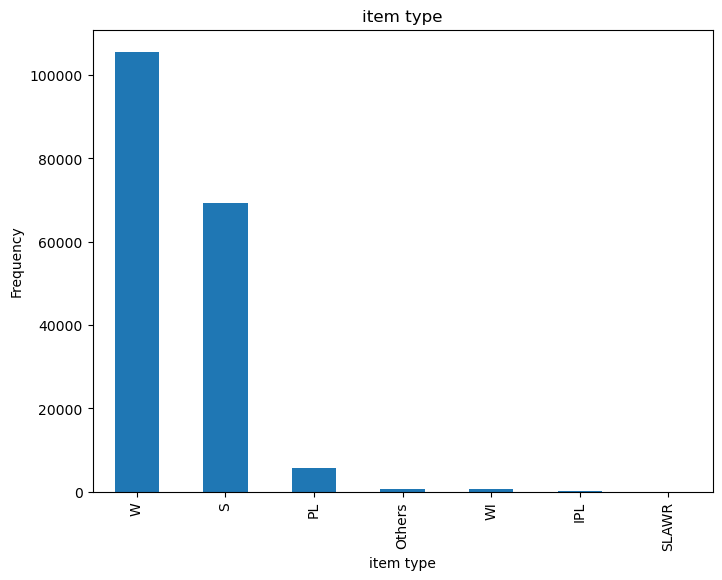

In [98]:
i=0
for col in cat_cols[2:4]:
#     if i==0:
#         i+=1
#         continue
    plt.figure(figsize=(8, 6)) # Adjust figsize as needed
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [27]:
skewness=df[num_cols].skew()
skewedCols=[]
# dfNum=df[num_cols]
for i in num_cols:
    if abs(skewness[i])>3:
        skewedCols.append(i)


In [28]:
skewedCols

['customer', 'thickness', 'delivery date', 'selling_price']

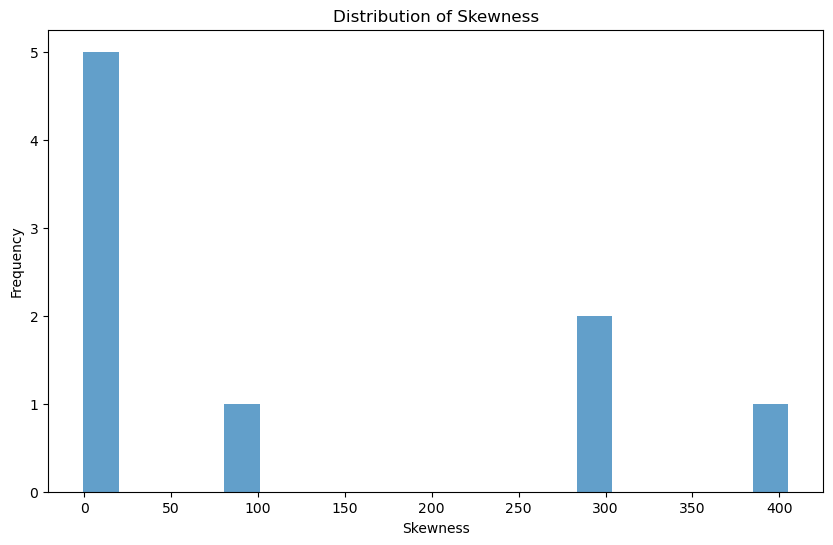

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(skewness, bins=20, alpha=0.7)
plt.xlabel('Skewness')
plt.ylabel('Frequency')
plt.title('Distribution of Skewness')
plt.show()


In [97]:
#handling missing values
df.isna().mean()

id               0.0
item_date        0.0
quantity tons    0.0
customer         0.0
country          0.0
status           0.0
item type        0.0
application      0.0
thickness        0.0
width            0.0
material_ref     0.0
product_ref      0.0
delivery date    0.0
selling_price    0.0
dtype: float64

In [48]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [96]:
x=df['delivery date'].mode()[0]
df["delivery date"].fillna(x,inplace=True)
y=df['material_ref'].mode()[0]
df["material_ref"].fillna(y,inplace=True)
z=df["application"].mean()
df["application"].fillna(z,inplace=True)
df["selling_price"].fillna(df["selling_price"].mean(),inplace=True)
df["thickness"].fillna(df["thickness"].mean(),inplace=True)
df["country"].fillna(df["country"].median(),inplace=True)
df["item_date"].fillna(df["item_date"].mode()[0],inplace=True)
df["customer"].fillna(df["customer"].median(),inplace=True)
df["status"].fillna("Draft",inplace=True)
df["id"].fillna(0,inplace=True)



In [92]:
df["customer"].describe()

count    1.816720e+05
mean     3.051221e+07
std      2.433382e+07
min      1.245800e+04
25%      3.019688e+07
50%      3.020524e+07
75%      3.028042e+07
max      2.147484e+09
Name: customer, dtype: float64

In [ ]:
# dealing with outliers
plt.Figure(figsize=(8,len(num_cols)))

for i,col in enumerate(num_cols):
#     plt.figure(figsize=(10, 10))  # Adjust figsize as needed
    plt.subplot(len(num_cols),1,i+1)
    sns.displot(df,x=col)   # You can use different plot types like scatter, boxplot, etc.
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [106]:
# outlier detection using isolation forest
isf=IsolationForest(contamination=0.05, random_state=42)

In [109]:
isf.fit(df[num_cols])
outliers=isf.predict(df[num_cols])


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
df.iloc[:,outliers]